# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 5_Machine Learning Overview and Algorithm

## 4. Regression



**Contents of this note refer to 1) book "Python Machine Learning"; 2) textbook "Data Science from Scratch"; 3) Dr. Robert Michael Lewis's teaching materials at Department of Computer Science, William & Mary; 4) Python toturial: https://docs.python.org/3/tutorial/**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

# Simple Linear Regression

The simplest example of regression is fitting a line to a set of data. Think of the $x$ coordinate as the feature or predictive variable and the $y$ coordinate as the observation. The goal of simple (univariate) linear regression is to model the relationship between a single feature (explanatory variable $x$) and a continuous valued response (target variable $y$).

In this case the model for the data (green squares) is a line:
$$
y(x) = w_{1}x + w_{0}.
$$

But how to choose the line?  We will choose $w_{0}, w_{1}$ that *minimize a measure of the misfit between observations and model predictions*. Here, the weight $w_0$ represents the $y$ axis intercepts and $w_1$ is the coefficient of the explanatory variable.

In classical least squares, if the training data are $(x_{1}, y_{1}), \ldots, (x_{t}, y_{t})$, we want to choose $a, b$ that minimize
$$
\sum_{i=1}^{t} (y_{i} - (w_{1}x_{i} + w_{0}))^{2}.
$$
The name least squares refers to the fact that we are finding the least value of this sum of squares measure of misfit.
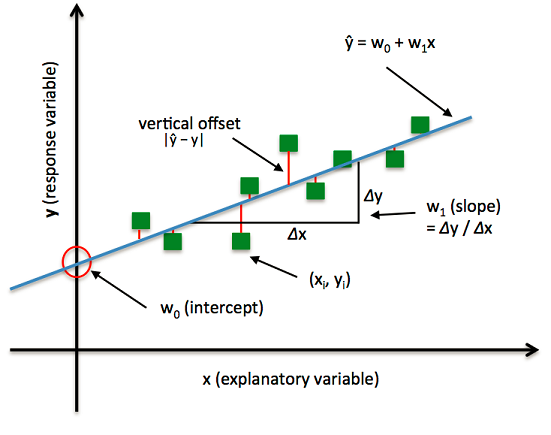

# Exploring the Housing dataset <a id="Exploring-the-Housing-Dataset"></a>

Source: 
[https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_boston.html](https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.load_boston.html)
and 
[https://github.com/adityatiwari13/Boston_Dataset](https://github.com/adityatiwari13/Boston_Dataset)

"Housing dataset contains information about different houses in Boston. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. The Boston house-price data has been used in many machine learning papers that address regression problems."


In [ ]:
# https://www.kaggle.com/code/alexandrecazals/sklearn-boston-housing-dataset
import pandas as pd  
from sklearn.datasets import load_boston

boston_dataset = load_boston()
print(boston_dataset.DESCR)

In [ ]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

# Visualizing the dataset using seaborn package

We introduced the Python package [seaborn](http://seaborn.pydata.org/), which is a statistical visualization package built on top of matplotlib.

### Pairwise plots

Here we plot pairwise plots of the variables LSTAT, INDUS, NOX, RM, and MEDV.

The pairwise plot of a variable with itself is a histogram of that variable's values.

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

## Pairwise correlations

We can also look at the pairwise correlations of variables.

This plot uses Pearson's correlation coefficient.

In [ ]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

In the following, we select LSTAT as explanatory variable $x$ and MEDV as target variable $y$ to built a simple linear regression model. That is, how can we predict MEDV using LSTAT?

The following example refers to https://intellipaat.com/blog/what-is-linear-regression/ .

**Step 1: extract data of these two variables**

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
data = df.loc[:, ['LSTAT', 'MEDV']]
data.head(5)

Pay attention to **loc()** function, which access a group of rows and columns by label(s) or a boolean array. **iloc()** is purely integer-location based indexing for selection by position.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
- https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79

**Step 2: Visualize the relation of these two variables again**

In [ ]:
import matplotlib.pyplot as plt
data.plot(x = 'LSTAT', y = 'MEDV', style = 'o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

**Step 3: Divide the data into explanatory variable and target variable**

In [ ]:
x = pd.DataFrame(data['LSTAT'])
y = pd.DataFrame(data['MEDV'])

**Step 4: Split the data into train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

**Step 5: Train the algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

**Step 6: Retrieve the intercept and slope**

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

**Step 7: Use the model to predict and show the results**

In [ ]:
y_pred = regressor.predict(x_test)
print(y_pred)

In [ ]:
# show the ground truth for comparison
y_test

**Step 8: Evaluate the algorithm**

### Regression Evaluation Metrics

- https://github.com/adityatiwari13/Boston_Dataset

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error: ', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', 
      metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Multiple Linear Regression

How can we build a predictor of the median value of houses as a function of all the other variables in our dataset?

One possible answer: Add all the variables into the linear regression model.

In this case the model for the data:
$$
y(x) = w_{0} + w_{1}x_{1} + w_{2}x_{2} + \dots + w_{k}x_{k}.
$$

where $y$ is the target variable, $x_{1}$ through $x_{k}$ are $k$ independent explanatory variables (components of $x$). $w_{0}$ through $w_{k}$ are the estimated regression coefficients.

**The following example refers to https://github.com/adityatiwari13/Boston_Dataset**

First, we will import the required libraries


In [ ]:
%matplotlib inline
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will load the housing data from the scikit-learn library.


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['Price'] = boston_dataset.target

In [ ]:
print(boston_dataset.keys())

data: contains the information for various houses.

target: prices of the house.

feature_names: names of the features.

DESCR: describes the dataset.

filename: location of file in your machine.

In [ ]:
df.head()

We can see that the target value MEDV is missing from the data. We create a new column of target values name **Price** and add it to the dataframe.

In [ ]:
df.count()

## Data Visualization

We visualize the pair-wise relationships and correlations between the different features.

It is also quite useful to have a quick overview of how the data is distributed and whether it contains outliers or not.

In [ ]:
sns.pairplot(df)

In [ ]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows , ncols = cols , figsize = (16,4))

col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index +=1 
plt.tight_layout()

We are going to create a correlation matrix to quantify and summarize the relationships between the variables.


In [ ]:
corrdat = df.corr()
corrdat

Use the heatmap function from the seaborn library to plot the correlation matrix.

In [ ]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})


To fit a linear regression model, we select those features which have a high correlation with our target variable Price. Below *getCorrelatedFeature()* function is used to find those features by comparing their absolute value of correlated features with threshold. 

In [ ]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    corr_df = pd.DataFrame(data = value, index = feature, 
                           columns = ['corr value'])
    return corr_df

In [ ]:
threshold = 0.4
corr_value = getCorrelatedFeature(corrdat['Price'],threshold)


In [ ]:
corr_value

In [ ]:
CD = df[corr_value.index]
CD.head()

### Spliting Data

In [ ]:
X = CD.drop(labels = ['Price'], axis = 1)
y = CD['Price']

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 0 )

X_train.shape , X_test.shape

### Train the model 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
predict = model.predict(X_test)
predict

In [ ]:
compare1 = pd.DataFrame({"Predicted":predict, "Actual":y_test})
compare1

**Performance evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

print("The performance for testing set")
print("-------------------------------")
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)